# Introdução ao CoolProp
## Cursos de Verão IFMG-Arcos 2023
### Rotinas computacionais aplicadas às Ciências Térmicas - GESESC
#### Autor: *Reginaldo Gonçalves Leão Junior*

CoolProp é uma biblioteca escrita em C++ com um *wrapers* para diversas linguagens, inclusive Python, em um ambiente Anaconda compatível ela pode ser instalada utilizando-se:

```
conda install -c conda-forge coolprop
```

Ela disponibiliza propriedades termodinâmicas de diversos compostos de forma gratuíta. Dentre as várias funcionalidades da biblioteca, a classe `PropsSI` permite a consulta de propriedades termodinâmmicas no SI.

### Instruções
1. Certifique-se de ter executado este Notebook em um ambiente com CoolProp instalado;
2. Realize a importação da classe `PropsSI` e determine o aumento na entalpia da água pura quando esta é aquecida de 25°C para 100°C em pressão atmosférica.

In [1]:
from CoolProp.CoolProp import PropsSI # Importação da classe.

In [2]:
# Entalpia a 25° C
h_25c = PropsSI('H', 'T', 25.+273.15, 'P', 101325., 'H2O')
print(f"Entalpia da água à 25°C: {h_25c:.4f} J/kg")

Entalpia da água à 25°C: 104920.1198 J/kg


In [3]:
# Entalpia a 100° C
h_100c = PropsSI('H', 'T', 100.+273.15, 'P', 101325., 'H2O')
print(f"Entalpia da água à 100 °C: {h_100c:.4f} J/kg")

Entalpia da água à 100 °C: 2675582.7870 J/kg


In [4]:
print(f"Aumento da entalpia da água entre 25°C e 100 °C: {(h_100c - h_25c):.4f} J/kg")

Aumento da entalpia da água entre 25°C e 100 °C: 2570662.6671 J/kg


Note como os valores foram passados: 
1. `25.+273.15`; 
2. `100.+273.15`;
3. `101325.`

Veja que as quantidades, mesmo as inteiras foram passadas com o ponto, ou seja, como valores do tipo `float`, isto evita que o interpretador do Python preciso realizar 
*type castings* implicitos, conferindo algum ganho de desempenho para a aplicação.

Agora vamos aperfeiçoar o estudo. Vamos determinar todas as entalpias entre 25 °C e 100 °C com um intervalo de 0,01 °C entre valores consecutivos.

Primeiro vamos testar uma rotina não vetorizada utilizando o método `append` das listas nativas de Python.

In [5]:
%%timeit
passo_tmp = 0.01
interv_tmps = [] # Lista vazia de temperaturas
entalpias = []
for t in range(int(1/passo_tmp*25.), int(1/passo_tmp*(100. + passo_tmp))):
    interv_tmps.append(t * passo_tmp)
    entalpias.append(PropsSI('H', 'T', t * passo_tmp + 273.15, 'P', 101325., 'H2O'))

505 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Em seguida o mesmo cálculo mas feito de forma vetorizada.

In [6]:
import numpy as np # Importação do NumPy para manipulação algébrica do vetores

In [7]:
%%timeit
vec_temps = np.arange(25., 100., 0.01) # Temperaturas
vec_hs  = PropsSI('H', 'T', vec_temps + 273.15, 'P', 101325., 'H2O') # Calcula as entalpias

143 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Veja como foi simples, em apenas duas linhas de código todos os cálculos foram feitos. O comando `%%timeit` utilizado serve para realizar um *benchmark* da execução do código, ele executa a célula várias vezes e determina a média dos tempos de cada uma das execuções, seu único problema é que ele não conserva o resultado dos cálculos, portanto a rotina deve ser executada mais uma vez para guardar os valores na memória.

In [8]:
vec_temps = np.arange(25., 1000., 1.) # Temperaturas
vec_hs  = PropsSI('H', 'T', vec_temps + 273.15, 'P', 101325., 'H2O') # Calcula as entalpias

Agora um gráfico pode ser criado com os resultados encontrados.

[]

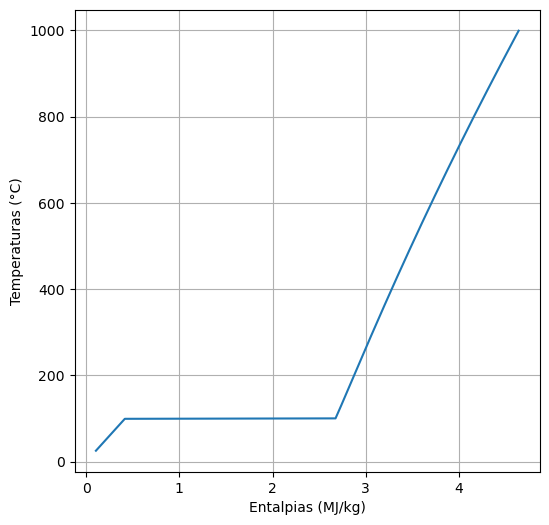

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(vec_hs/1e6, vec_temps)
ax.set_ylabel("Temperaturas (°C)")
ax.set_xlabel("Entalpias (MJ/kg)")
plt.grid()
plt.plot()

Um resultado um pouco mais curioso, poderia ser gerado da seguinte forma.

In [100]:
# Parametrização
n_iso_p = 7 # Número de curvas de isovalores de pressão
p0 = 1. # Pressão Inicial (atm)
pf = 3.6 # Pressão Final (atm)
vec_temps = np.arange(20., 800., 1.) # Temperaturas
vec_press = np.logspace(p0, pf, n_iso_p)/10

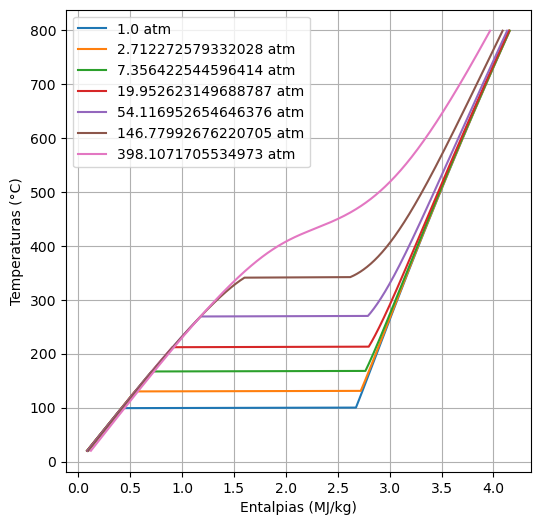

In [104]:
# Cálculos
fig, ax = plt.subplots(figsize = (6,6))
for p in vec_press:
    vec_hs  = PropsSI('H', 'T', vec_temps + 273.15, 'P', p * 101325., 'H2O') # Calcula as entalpias
    ax.plot(vec_hs/1e6, vec_temps, label=f"{p} atm")
ax.set_ylabel("Temperaturas (°C)")
ax.set_xlabel("Entalpias (MJ/kg)")
ax.legend()
ax.grid()
plt.show()

#### Atividade 1
Reproduza o gráfico anterior utilizando curvas de isovalores de temperatura (isotermas) no lugar de curvas de isovalores de pressão.
Para uma visualização mais completa do comportamento, use temperaturas entre 20 e 500°C, e pressões log-espaçadas entre 0.5 e 4.0 atm.

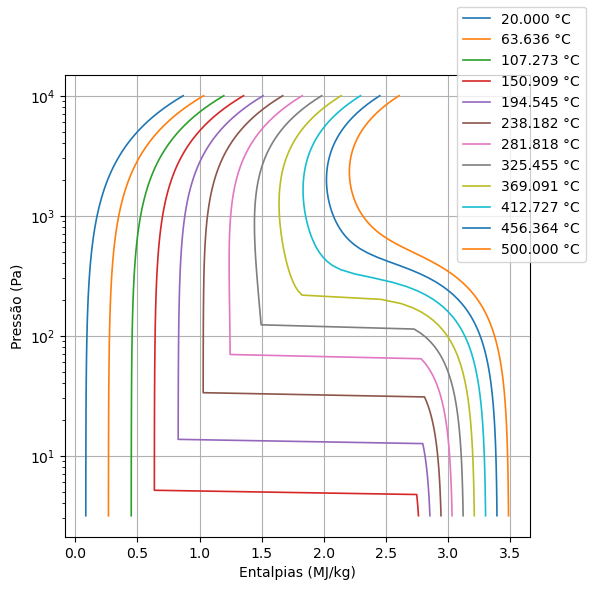

In [170]:
# Parametrização
n_iso_p = 12 # Número de curvas de isovalores de pressão
t0 = 20. # Temperatura Inicial (atm)
tf = 500. # Temperatura Final (atm)
vec_press = np.logspace(.5, 4., 100) # pressões
vec_temps = np.linspace(t0, tf, n_iso_p)
# Cálculos
fig, ax = plt.subplots(figsize = (6,6))
for t in vec_temps:
    vec_hs  = PropsSI('H', 'T', t + 273.15, 'P', vec_press * 101325., 'H2O') # Calcula as entalpias
    ax.plot(vec_hs/1e6, vec_press,label=f"{t:.3f} °C", linewidth=1.2)
ax.set_ylabel("Pressão (Pa)")
ax.set_yscale('log')
ax.set_xlabel("Entalpias (MJ/kg)")
fig.legend()
ax.grid()
plt.show()